In [ ]:
from google.colab import files
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import io

uploaded = files.upload()

facebook_ads_data = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[facebook_ads_data]))

print(df.head())

Saving facebook_ads_data.csv to facebook_ads_data.csv
      ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0  2022-11-05     Expansion         0.00                  0             0   
1  2022-11-01     Expansion         0.00                  0             0   
2  2022-10-31     Expansion       227.45               6054            58   
3  2022-10-30     Expansion       335.91              27562            69   
4  2022-10-29     Expansion       714.03              33358           115   

   total_value   cpc    cpm       ctr      romi  
0         0.00   NaN    NaN       NaN       NaN  
1         0.00   NaN    NaN       NaN       NaN  
2       191.87  3.92  37.57  0.009580  0.843570  
3       472.61  4.87  12.19  0.002503  1.406954  
4       680.34  6.21  21.41  0.003447  0.952817  


In [ ]:
df['ad_date'] = pd.to_datetime(df['ad_date'])

In [ ]:
grouped_df = df.groupby(df['ad_date'].dt.date).agg({
    'total_spend': 'sum',
    'romi': 'sum'
}).reset_index()
print(grouped_df.head())

      ad_date  total_spend      romi
0  2020-11-11         1.89  1.259259
1  2020-11-12        23.00  0.918696
2  2020-11-13         6.36  1.536164
3  2020-11-14         7.27  1.742779
4  2020-11-15         6.98  1.570201


In [ ]:
df_2021 = df[df['ad_date'].dt.year == 2021]

In [ ]:
df_2021_daily_total = df_2021.groupby('ad_date')['total_spend'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_2021_daily_total['ad_date'], y=df_2021_daily_total['total_spend'], mode='lines', line=dict(color='royalblue', width=2), name='Total Spend'))
fig.update_layout(title='Total Advertising Spend in 2021',
                  xaxis_title='Date',
                  yaxis_title='Total Spend',
                  showlegend=True)
fig.show()

In [ ]:
df_2021_romi = df_2021.groupby('ad_date')['romi'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_2021_romi['ad_date'], y=df_2021_romi['romi'], mode='lines+markers', marker_color='green', name='ROMI'))
fig.add_shape(type="line", x0=df_2021_romi['ad_date'].min(), y0=0, x1=df_2021_romi['ad_date'].max(), y1=0,
              line=dict(color="red", width=1, dash="dash"), name="Breakeven Point")
fig.update_layout(title='Daily ROMI in 2021',
                  xaxis_title='Date',
                  yaxis_title='ROMI',
                  showlegend=True)
fig.show()

In [ ]:
df_2021_romi['rolling_romi'] = df_2021_romi['romi'].rolling(window=20, min_periods=1).mean()

In [ ]:
df_2021_daily_total['rolling_total_spend'] = df_2021_daily_total['total_spend'].rolling(window=20, min_periods=1).mean()

In [ ]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Media Mobilă a Totalului Cheltuielilor", "Media Mobilă a ROMI-ului"))

In [ ]:
fig.add_trace(go.Scatter(x=df_2021_daily_total['ad_date'], y=df_2021_daily_total['rolling_total_spend'], mode='lines', name='Media Mobilă a Totalului Cheltuielilor', line=dict(color='royalblue', width=2)), row=1, col=1)
fig.add_trace(go.Scatter(x=df_2021_romi['ad_date'], y=df_2021_romi['rolling_romi'], mode='lines+markers', name='Media Mobilă a ROMI-ului', line=dict(color='green', width=2)), row=2, col=1)

In [ ]:
grouped = df.groupby('campaign_name').agg({'total_spend': 'sum', 'romi': 'sum'}).reset_index()

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=grouped['campaign_name'], y=grouped['total_spend'], marker_color='darkolivegreen'))
fig1.update_layout(title='Suma Totală a Cheltuielilor Publicitare pentru Fiecare Campanie',
                   xaxis_title='Numele Campaniei',
                   yaxis_title='Total Cheltuieli',
                   plot_bgcolor='rgba(240, 230, 140, 0.2)',
    )

In [ ]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=grouped['campaign_name'], y=grouped['romi'], marker=dict(color=grouped['romi'], colorscale='magma')))
fig2.update_layout(title='ROMI-ul Total pentru Fiecare Campanie',
                   xaxis_title='Numele Campaniei',
                   yaxis_title='Total ROMI')

In [ ]:
fig = go.Figure()

In [ ]:
for campaign in df['campaign_name'].unique():
    fig.add_trace(go.Box(
        y=df[df['campaign_name'] == campaign]['romi'],
        name=campaign,
        boxmean='sd'
    ))

fig.update_layout(
    title={
        'text': '<b><i>Distribuția ROMI-ului Zilnic pentru Fiecare Campanie</i></b>',
        'font': {
            'family': 'Arial',
            'size': 16,
            'color': 'black'
        }
    },
    xaxis_title={
        'text': '<b><i>Numele Campaniei</i></b>',
        'font': {
            'family': 'Arial',
            'size': 14,
            'color': 'black'
        }
    },
    yaxis_title={
        'text': '<b><i>ROMI</i></b>',
        'font': {
            'family': 'Arial',
            'size': 14,
            'color': 'black'
        }
    },
    plot_bgcolor='rgba(255, 182, 193, 0.2)',
    paper_bgcolor='rgba(0, 0, 0, 0)'
   )

fig.show()

In [ ]:
formatted_romi = df['romi'].map(lambda x: "{:.2f}".format(x))
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=formatted_romi,
    marker_color='darkcyan'
))

fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

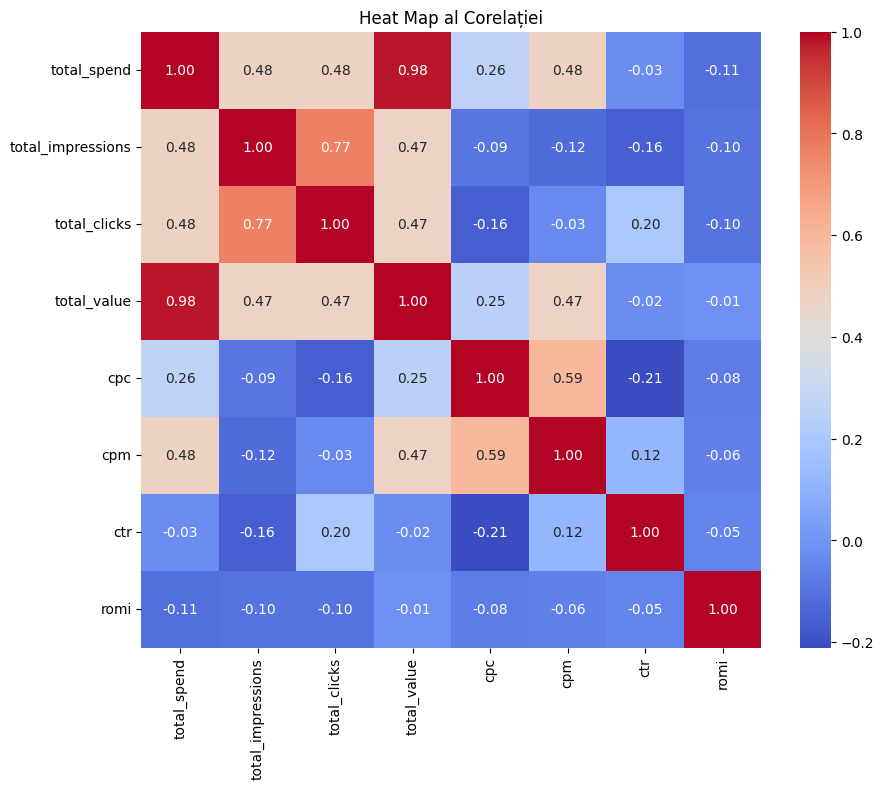

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat Map al Corelației')
plt.show()

In [ ]:
max_correlation = correlation_matrix.max().max()
max_correlation_indicators = correlation_matrix[correlation_matrix == max_correlation].stack().index.tolist()

min_correlation = correlation_matrix.min().min()
min_correlation_indicators = correlation_matrix[correlation_matrix == min_correlation].stack().index.tolist()

print("Cea mai mare corelație:")
for indicator_pair in max_correlation_indicators:
    print(f"- {indicator_pair[0]} și {indicator_pair[1]}: {max_correlation}")

print("\nCea mai mică corelație:")
for indicator_pair in min_correlation_indicators:
    print(f"- {indicator_pair[0]} și {indicator_pair[1]}: {min_correlation}")

total_value_correlation = correlation_matrix['total_value'].drop('total_value')
print("\nCorelația indicatorului 'total_value' cu ceilalți indicatori:")
print(total_value_correlation)

Cea mai mare corelație:
- total_spend și total_spend: 1.0
- total_impressions și total_impressions: 1.0
- total_clicks și total_clicks: 1.0
- total_value și total_value: 1.0
- cpc și cpc: 1.0
- cpm și cpm: 1.0
- ctr și ctr: 1.0
- romi și romi: 1.0

Cea mai mică corelație:
- cpc și ctr: -0.2107190927671994
- ctr și cpc: -0.2107190927671994

Corelația indicatorului 'total_value' cu ceilalți indicatori:
total_spend          0.978890
total_impressions    0.472037
total_clicks         0.472124
cpc                  0.250851
cpm                  0.471338
ctr                 -0.022267
romi                -0.013733
Name: total_value, dtype: float64


In [ ]:
fig = px.scatter(df, x='total_spend', y='total_value', trendline='ols', title='Relația dintre Total Spend și Total Value')

fig.show()